Using TensorFlow backend.


10977280/11490434 [===========================>..] - ETA: 0s ETA: (50000, 28, 28) (50000,)


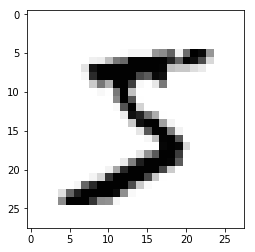

In [1]:
from preprocessed_mnist import load_dataset
X_train_orig, y_train_orig, X_val_orig, y_val_orig, X_test_orig, y_test_orig = load_dataset()
print(X_train_orig.shape, y_train_orig.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train_orig[0], cmap="Greys");

In [2]:
import tensorflow as tf
import numpy as np

# Having a better Understanding about The Data

In [3]:
print ("number of training examples = " + str(X_train_orig.shape[0]))
print ("number of test examples = " + str(X_test_orig.shape[0]))
print ("X_train shape: " + str(X_train_orig.shape))
print ("Y_train shape: " + str(y_train_orig.shape))
print ("X_val shape: " + str(X_val_orig.shape))
print ("Y_val shape: " + str(y_val_orig.shape))
print ("X_test shape: " + str(X_test_orig.shape))
print ("Y_test shape: " + str(y_test_orig.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 28, 28)
Y_train shape: (50000,)
X_val shape: (10000, 28, 28)
Y_val shape: (10000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


# 1. Prepare the Data set
- flatten the X data to get a vector instead of a matrix
- fit the label data (y) to have matrix of 10 classes in order to pass it in the softmax function

###  1.1 Flatten the dataset

In [4]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1)
X_val_flatten = X_val_orig.reshape(X_val_orig.shape[0], -1)
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1)

# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
X_val = X_val_flatten/255.


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("X_val shape: " + str(X_val.shape))
print ("X_test shape: " + str(X_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 784)
X_val shape: (10000, 784)
X_test shape: (10000, 784)


**Note:**
``size of an image vector (num_px * num_px = 28 * 28 * 1 = 784) # the image we have in a gray scale``

### 1.2 Prepare the label data to fit into classes
**Note: number of classes, C=10 from 0 till 9**


As we can see from the data.
The elements in the label vector y have values go from 0 to 9.
Which refer to the hand digit number in the picture of the dataset.
in order to have a softmax function for classification we need to have for each number of the inputdata a distictive column and its rows input are either 0 or 1.
As an input we need a matrix with 10 columns and m rows. `Where m is the number of the examples data = X_train.shape[0]`

In [5]:
# Visualize the Data
print("The y_train data:",y_train_orig[0:30])
print("The y_test data:",y_test_orig[0:30])
print("The y_val data:",y_val_orig[0:30])

The y_train data: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
The y_test data: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
The y_val data: [3 8 6 9 6 4 5 3 8 4 5 2 3 8 4 8 1 5 0 5 9 7 4 1 0 3 0 6 2 9]


In [6]:
# convert to one-hot encooding
import numpy as np
y_train = np.eye(10)[y_train_orig]
y_test = np.eye(10)[y_test_orig]
y_val = np.eye(10)[y_val_orig]

print ("Y_train shape: " + str(y_train.shape))
print ("Y_test shape: " + str(y_test.shape))
print ("Y_val shape: " + str(y_val.shape))

Y_train shape: (50000, 10)
Y_test shape: (10000, 10)
Y_val shape: (10000, 10)


# 2. Build a Neural Network.


**Goals**    
- Code a deep (with at least 1 hidden layer) neural network in tensorflow
- Fit it on the train dataset, estimate quality on the test dataset
- Plot the train loss and test loss as a function of the training iteration number 

**[bonus score]** If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuracy on the test set.

**The model** is *LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

**Don't forget to shuffle the data**

### 2.1 Create Placeholders

In [7]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 28 * 28 * 1 = 784) # the image we have in a gray scale
    n_y -- scalar, number of classes (from 0 to 9, so -> 10)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float64"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float64"
    """
    # Placeholders for the input data
    # input_X = tf.placeholder(...)
    # input_y = tf.placeholder(...)
    X = tf.placeholder(tf.float64, [ None, n_x],name = "X")
    Y = tf.placeholder(tf.float64, [None, n_y],name = "Y")
    
    return X,Y

In [8]:
# test the placeholder function
X, Y = create_placeholders(784, 10)
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))

X_train shape: (50000, 784)
Y_train shape: (50000, 10)


### 2.2 Create Variables

In [9]:
def initialize_parameters(n_x = 784, num_neurons = 50,num_classes = 10):
    """
    Initializes parameters to build a neural network with tensorflow.
    Arguments:
    n_x -- size of an image vector (num_px * num_px = 28 * 28 * 1 = 784)
    The shapes are:
                        W1 : [50, 784]
                        b1 : [50, 1]
                        W2 : [10, 50]
                        b2 : [10, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2
    """
        
    weights1 = tf.get_variable("weights1", [n_x,num_neurons], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64),dtype=tf.float64) #weights for the 1st layer
    bias1 = tf.get_variable("bias1", [num_neurons], initializer = tf.zeros_initializer(dtype=tf.float64),dtype=tf.float64) #biases for the 1st layer
    weights2 = tf.get_variable("weights2", [num_neurons,num_classes], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64),dtype=tf.float64) #weights for the 2nd layer
    bias2 = tf.get_variable("bias2", [num_classes], initializer = tf.zeros_initializer(dtype=tf.float64),dtype=tf.float64) #biases for the 2nd layer

    parameters = {"weights1": weights1,
                  "bias1": bias1,
                  "weights2": weights2,
                  "bias2": bias2,}
    
    return parameters

In [13]:
# Test the parameters function
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["weights1"]))
    print("b1 = " + str(parameters["bias1"]))
    print("W2 = " + str(parameters["weights2"]))
    print("b2 = " + str(parameters["bias2"]))

W1 = <tf.Variable 'weights1:0' shape=(784, 50) dtype=float64_ref>
b1 = <tf.Variable 'bias1:0' shape=(50, 1) dtype=float64_ref>
W2 = <tf.Variable 'weights2:0' shape=(50, 10) dtype=float64_ref>
b2 = <tf.Variable 'bias2:0' shape=(1, 10) dtype=float64_ref>


### 2.3 - Forward propagation

In [10]:
def forward_propagation(X_train, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "weights1", "bias1", "weights2", "bias2"
                  the shapes are given in initialize_parameters

    Returns:
    pred_y -- the output of the last (the prediction) LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['weights1']
    b1 = parameters['bias1']
    W2 = parameters['weights2']
    b2 = parameters['bias2']

    
    Z1 = tf.add(tf.matmul(X_train,W1),b1)                      
    A1 = tf.nn.relu(Z1)                                   
    pred_y = tf.add(tf.matmul(A1,W2),b2)                       
    
    
    return pred_y

In [18]:
# test the forward progagation function
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(X_train.shape[1], 10)
    parameters = initialize_parameters()
    pred_y = forward_propagation(X, parameters)
    print("pred_y = " + str(pred_y))

pred_y = Tensor("Add_1:0", shape=(50, 10), dtype=float64)


### 2.4 Compute the Cost

In [11]:
def compute_cost(pred_y, Y):
    """
    Computes the cost
    
    Arguments:
    Z2 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z2
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(pred_y)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_y, labels = Y))
    ### END CODE HERE ###
    
    return cost

In [20]:
# test the cost function
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(784, 10)
    parameters = initialize_parameters()
    pred_y = forward_propagation(X, parameters)
    cost = compute_cost(pred_y, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float64)


### 2.5 Backward propagation & parameters update

- probably better to use STOCHASTIC gradient descent (minibatch)
- sample should probably be shuffled (or use random subsamples on each iteration)

### 2.6 Building the model

In [12]:
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

In [21]:
ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
m = X_train.shape[0]                              # m : number of examples in the train set)
n_x = X_train.shape[1]                            # n_x: input size, 
n_y = y_train.shape[1]                            # n_y : output size
train_costs = []                                  # To keep track of the cost
test_costs = []

num_iterations = 150
batch_size = 32

learning_rate = 0.0005

# Create Placeholders of shape (n_x, n_y)
X, Y = create_placeholders(n_x, n_y)
    
# Initialize parameters
parameters = initialize_parameters()
   
# Forward propagation: Build the forward propagation in the tensorflow graph
pred_y = forward_propagation(X, parameters)
 
# Cost function: Add cost function to tensorflow graph
cost = compute_cost(pred_y, Y)
    
# Backpropagation: Define the tensorflow optimizer. Using an AdamOptimizer.
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
# Initialize all the variables
init = tf.global_variables_initializer()    

cost after 10 iterations: 0.36634869559
cost after 20 iterations: 0.297083655429
cost after 30 iterations: 0.264567799946
cost after 40 iterations: 0.241661708002
cost after 50 iterations: 0.222630134644
cost after 60 iterations: 0.205748932664
cost after 70 iterations: 0.190323736276
cost after 80 iterations: 0.176470269573
cost after 90 iterations: 0.164373538249
cost after 100 iterations: 0.153667278999
cost after 110 iterations: 0.143933405089
cost after 120 iterations: 0.135259031347
cost after 130 iterations: 0.127467408414
cost after 140 iterations: 0.120350087471
cost after 150 iterations: 0.113859119916


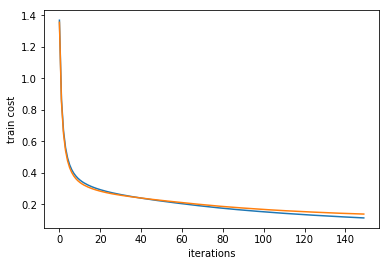

Train Accuracy: 0.9676
Test Accuracy: 0.9593
Validation Accuracy: 0.9622


In [22]:
with tf.Session() as sess:
    sess.run(init)
     
    for iteration in range(num_iterations):
        for i in range(0, m, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size]})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test}))
        if iteration%10 == 9:
            print("cost after " + str(iteration+1)+ " iterations: "+ str(train_costs[-1]))
    
    iterations = list(range(num_iterations))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(pred_y, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: y_test}))
    print ("Validation Accuracy:", accuracy.eval({X: X_val, Y: y_val}))
   